In [2]:
!git clone https://github.com/SkalskiP/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 325 (delta 165), reused 264 (delta 162), pack-reused 0
Receiving objects: 100% (325/325), 2.23 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [3]:
!cd yolov9

In [4]:
!pip install -r /content/yolov9/requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00


In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [6]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [7]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

In [8]:
import roboflow

%cd {HOME}/yolov9

roboflow.login()
rf = roboflow.Roboflow()
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(1).download("yolov7")

/content/yolov9
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-1 in yolov7pytorch:: 100%|██████████| 1338/1338 [00:00<00:00, 2246.28it/s]


In [9]:
%cd {HOME}/yolov9
!python /content/yolov9/train.py \
--batch 16 --epochs 20 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-04-26 20:22:55.408884: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 20:22:55.408933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 20:22:55.410298: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 20:22:56.455485: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/football-players-detection-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False

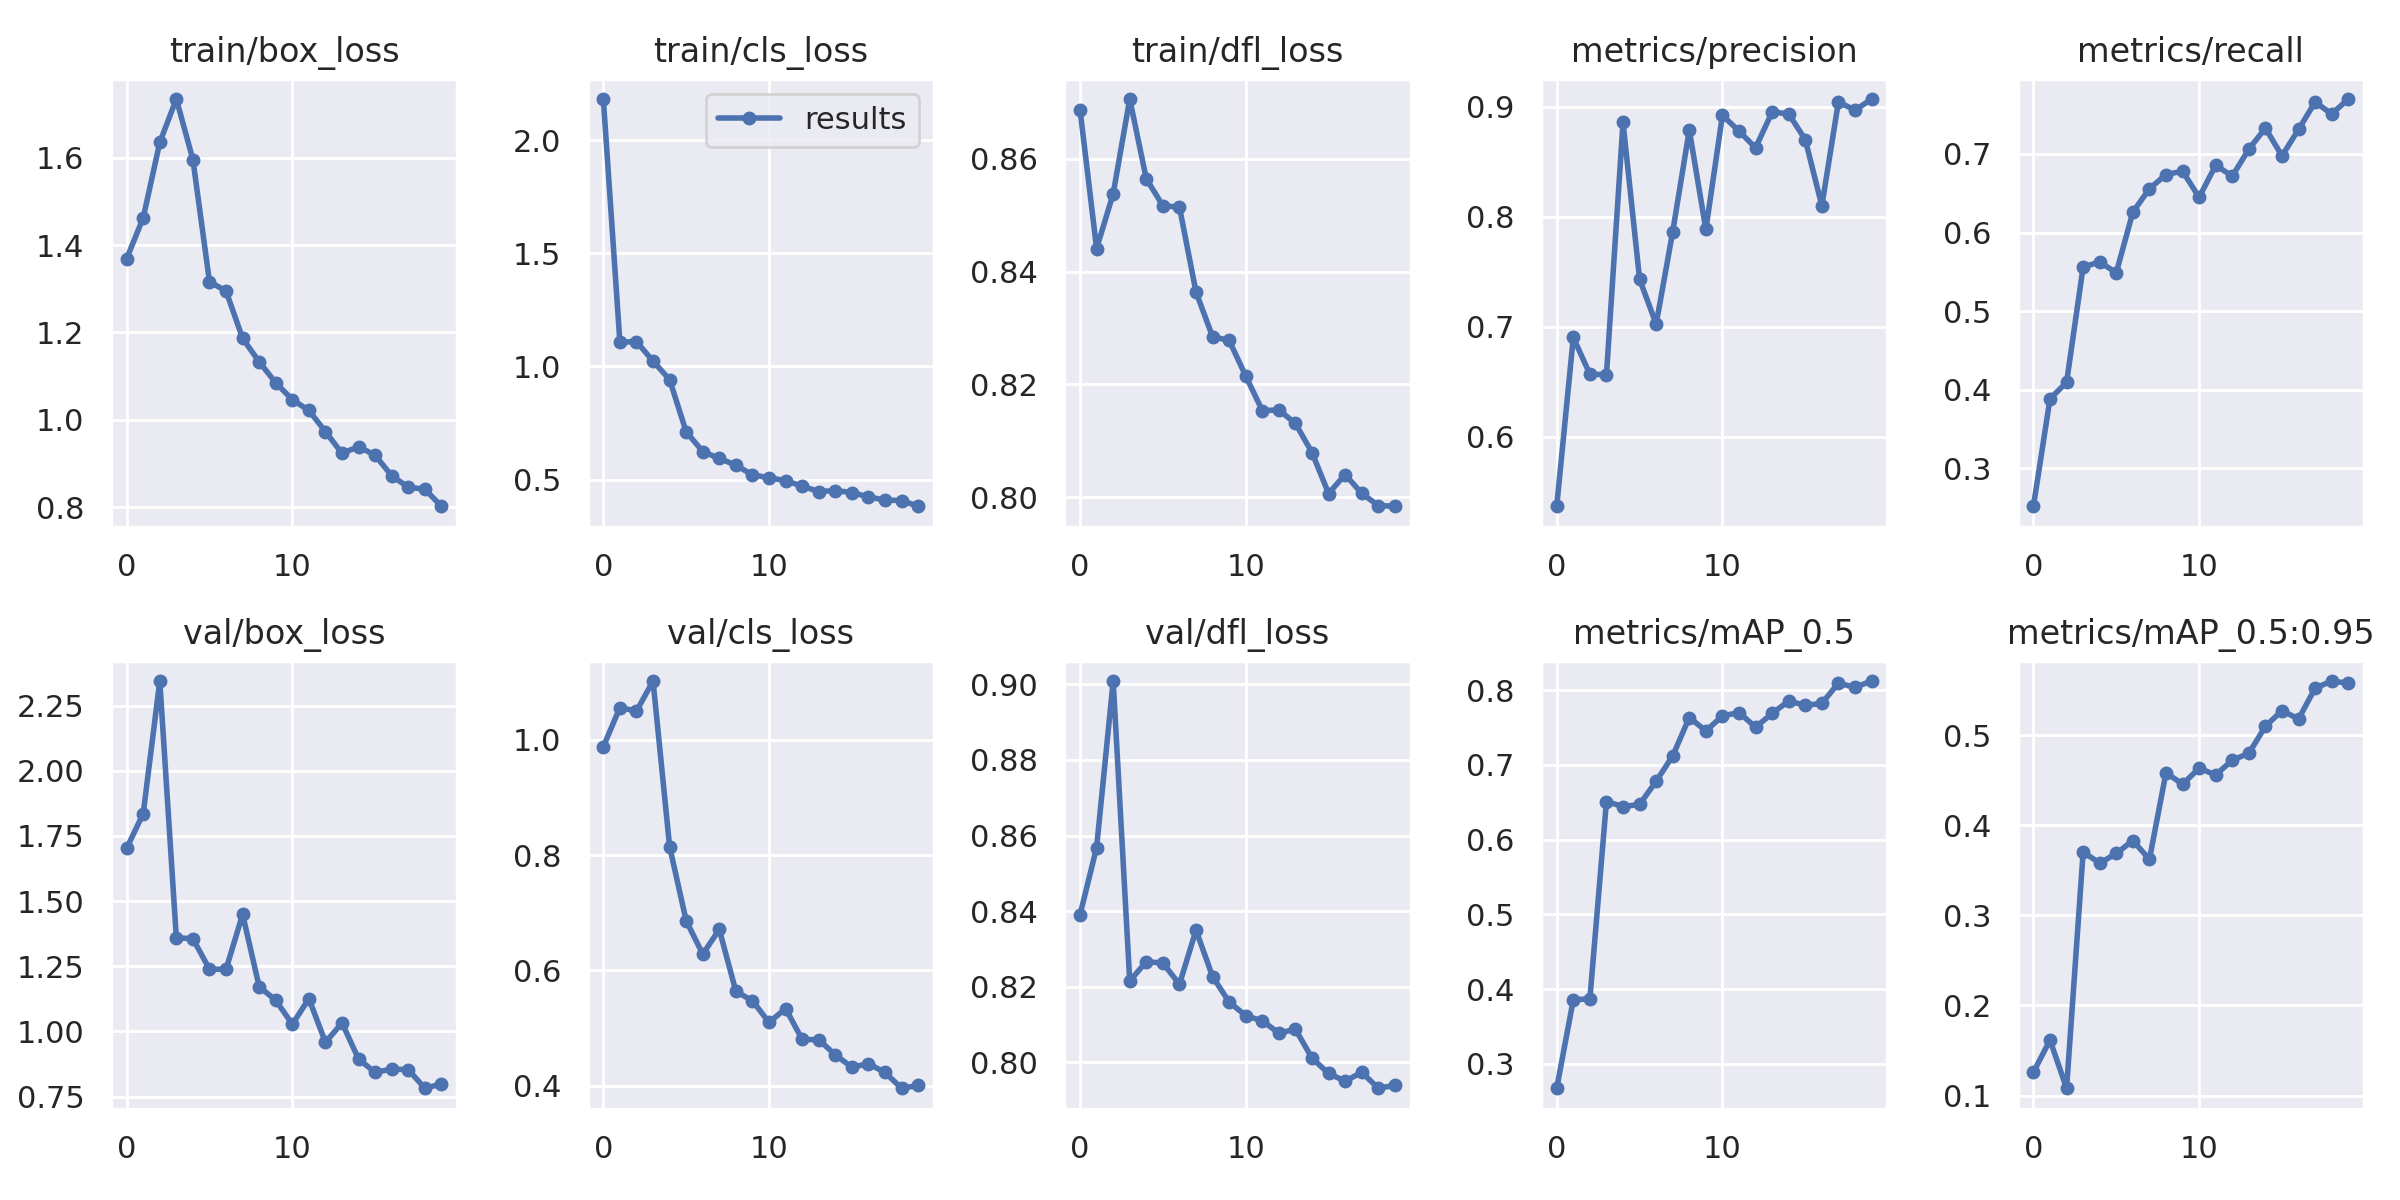

In [10]:
from IPython.display import Image, display
Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

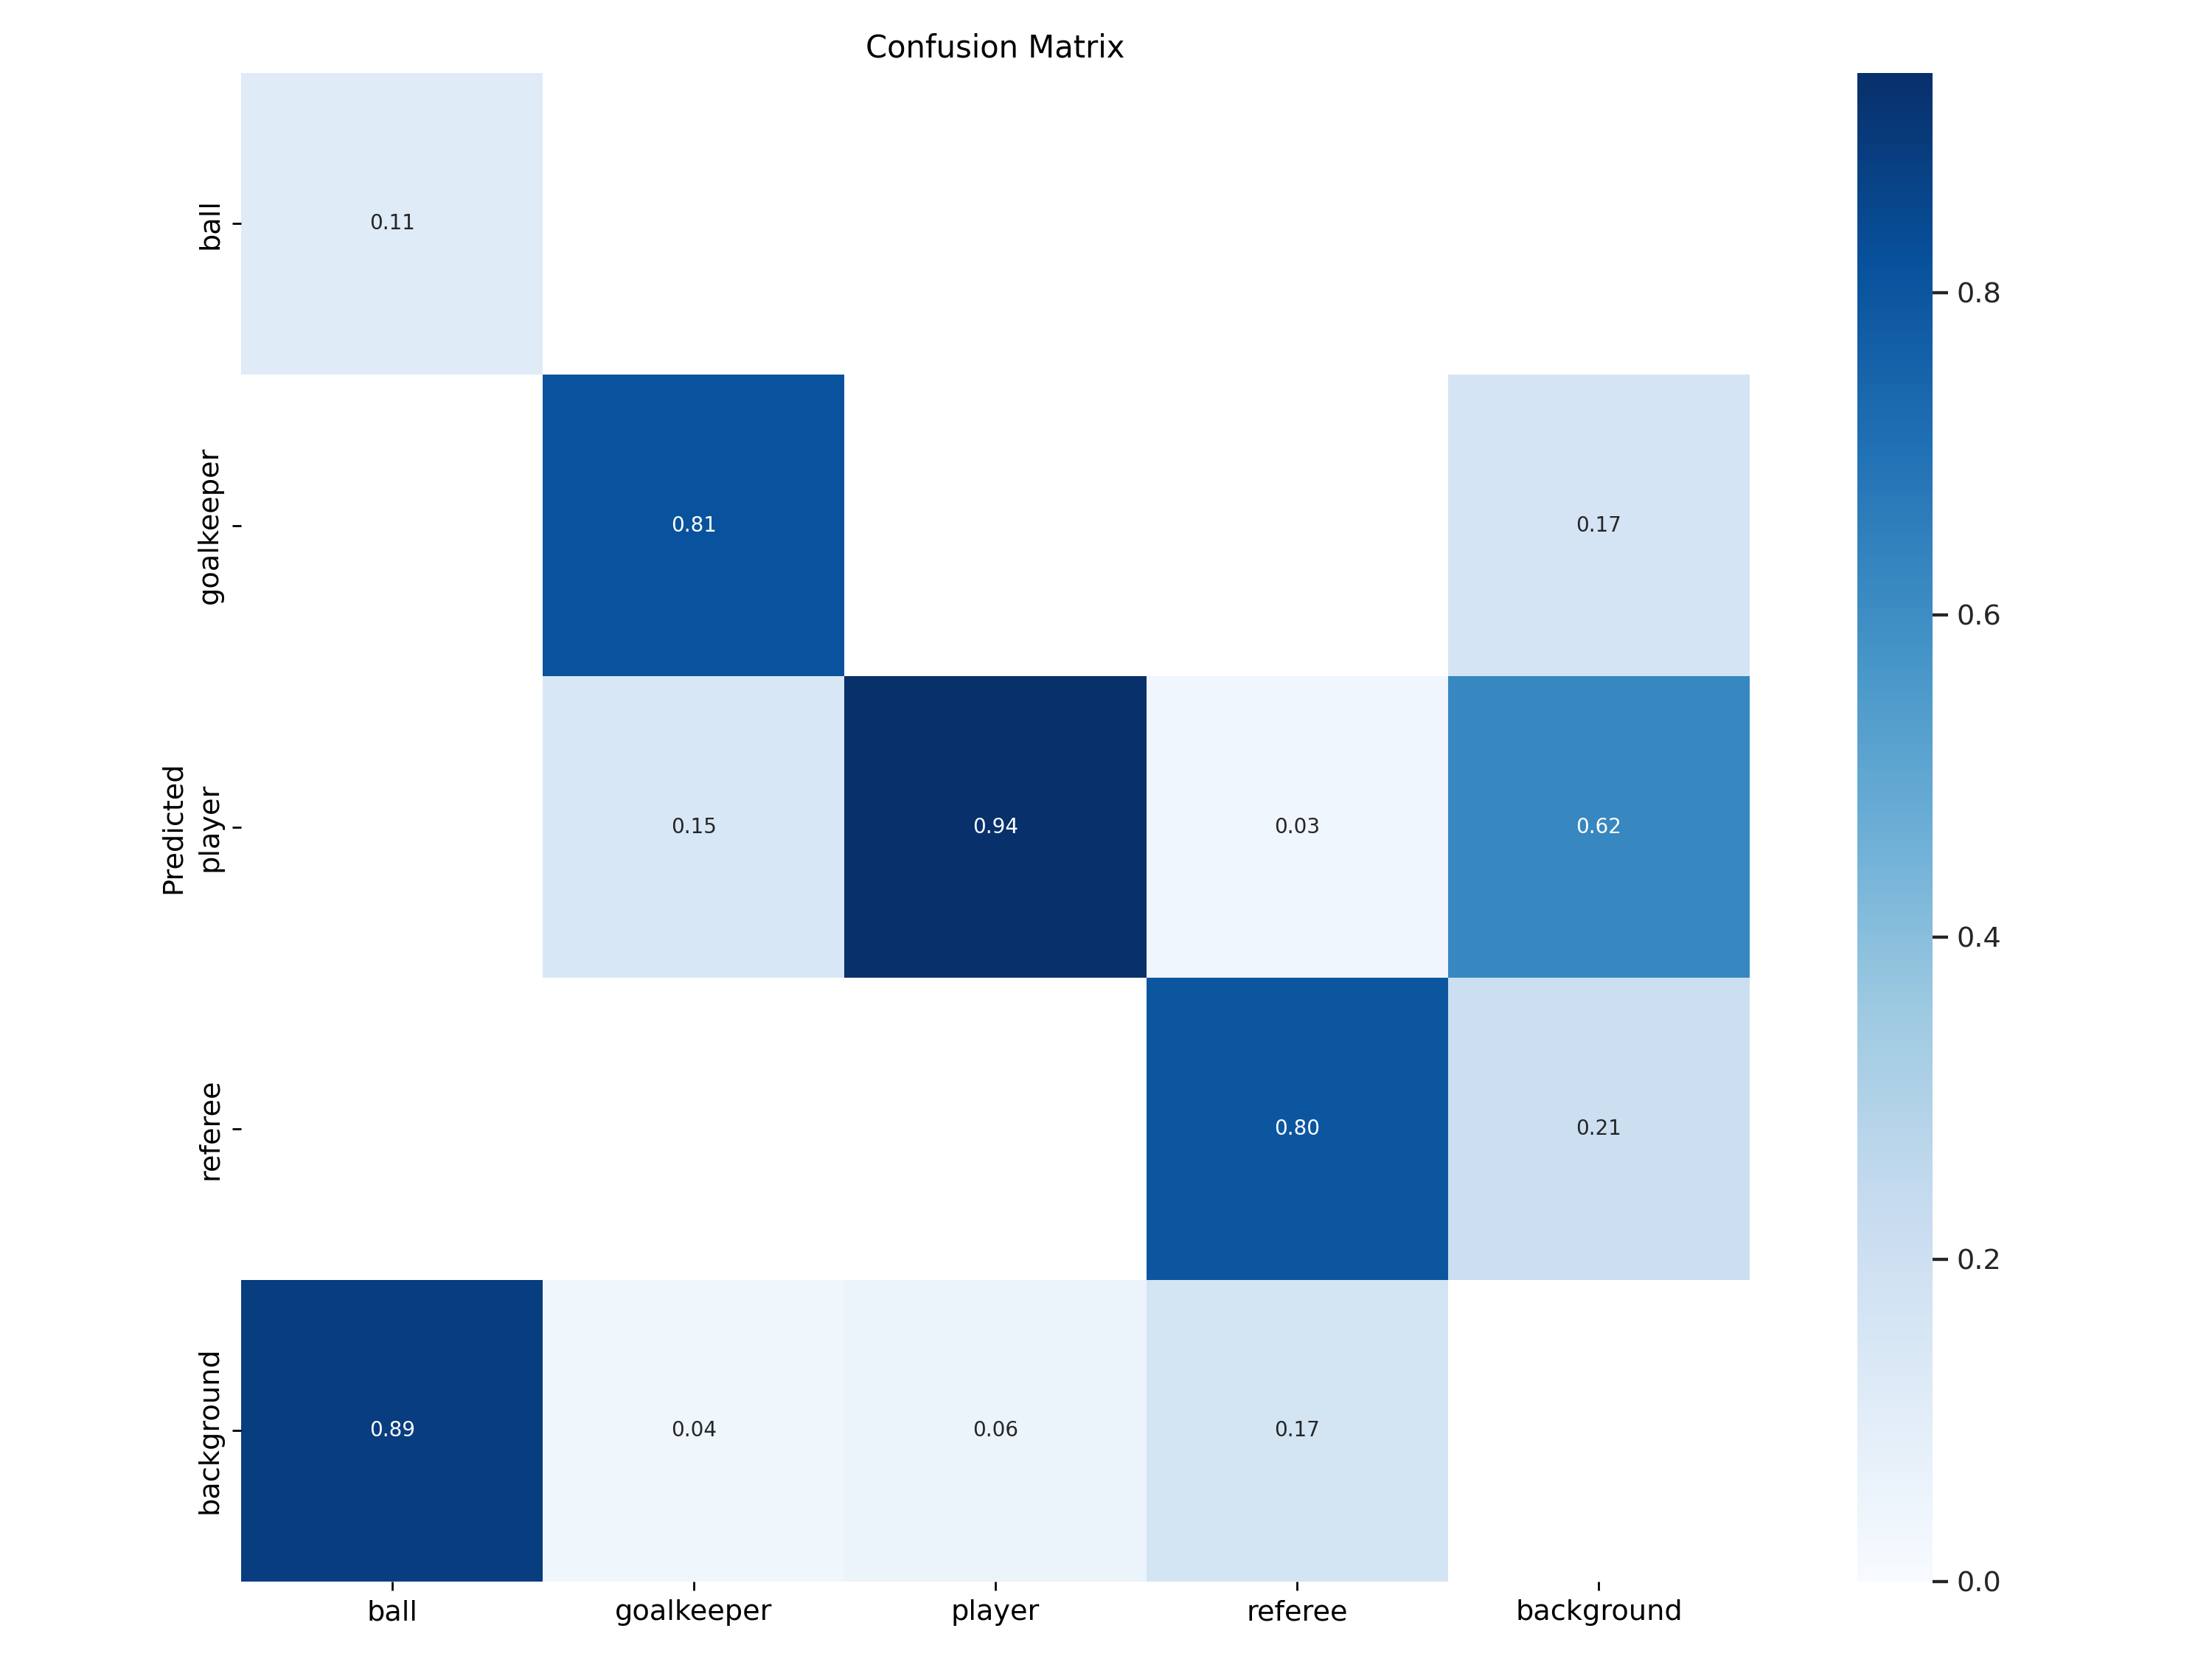

In [11]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

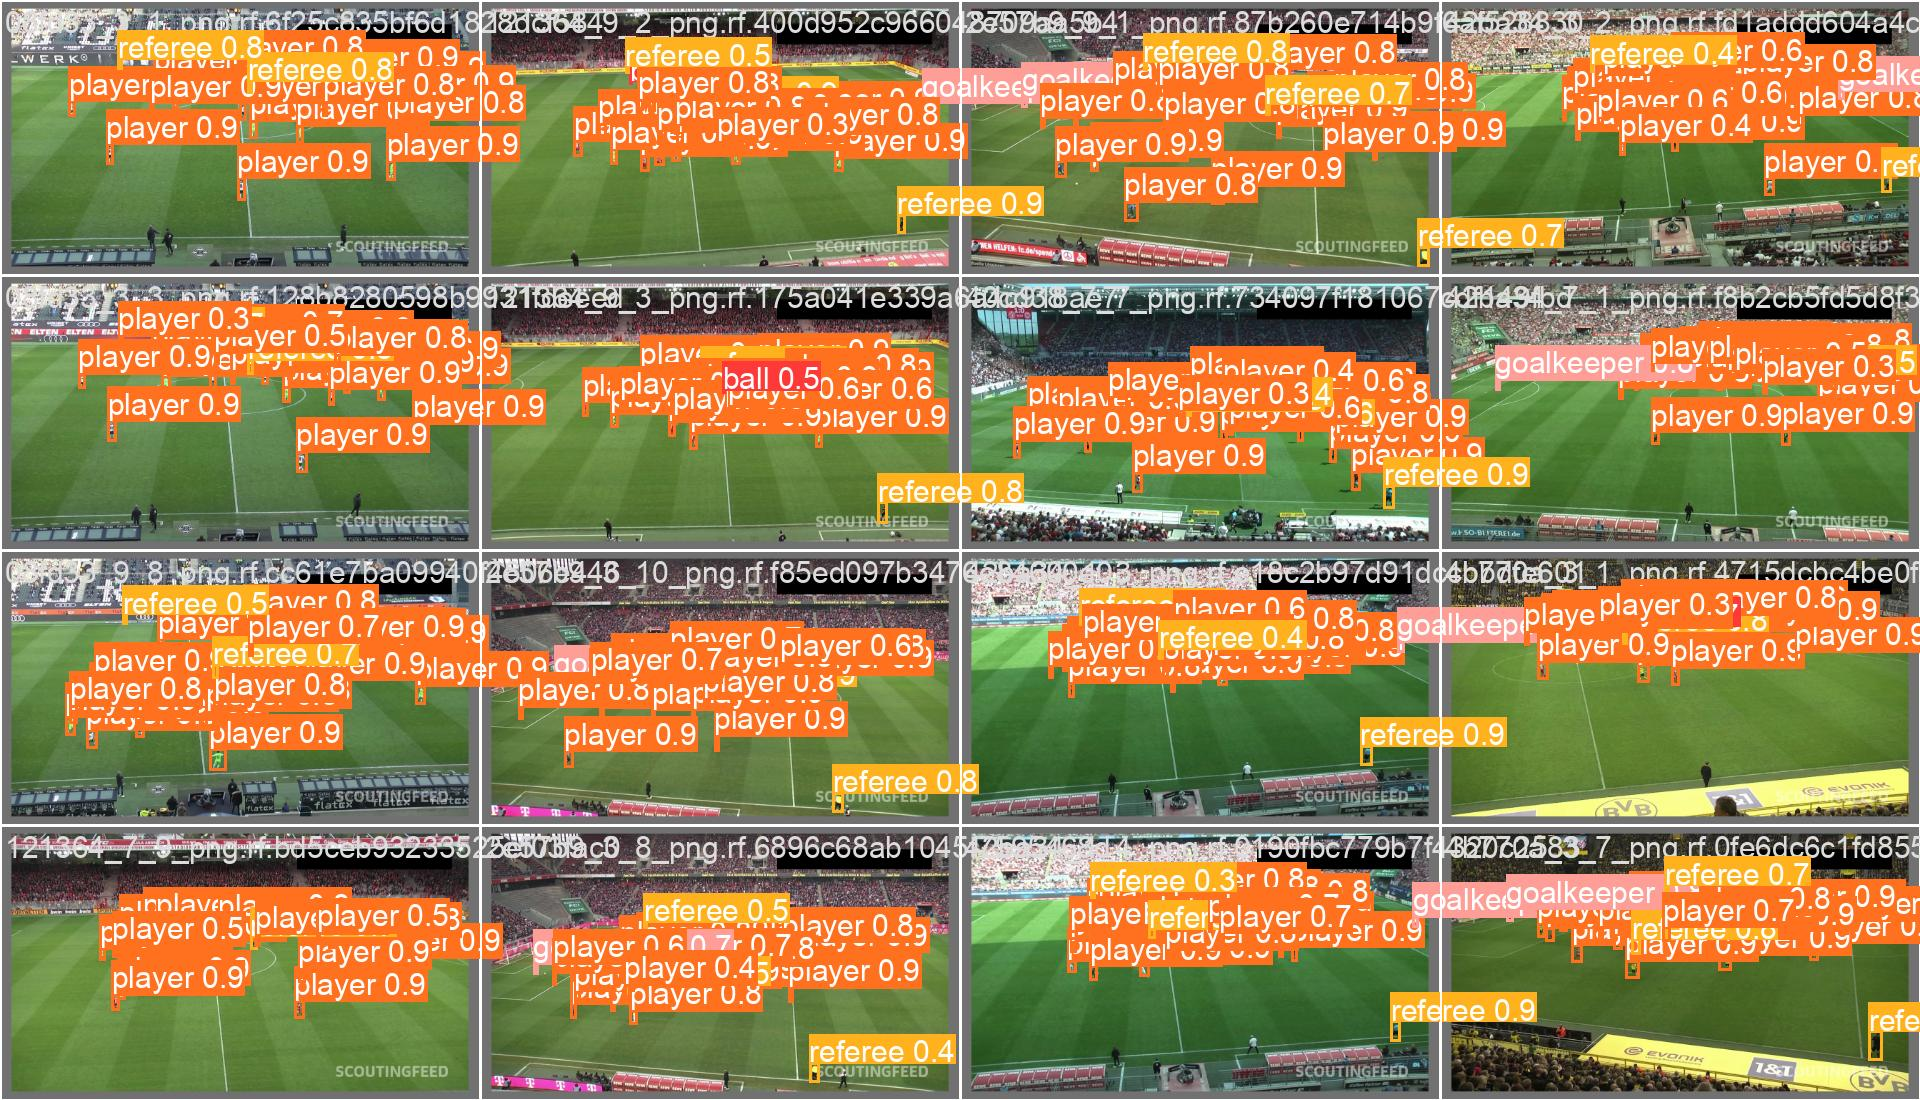

In [12]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

In [13]:
!python /content/yolov9/detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/football-players-detection-1/valid/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
image 1/38 /content/yolov9/football-players-detection-1/valid/images/08fd33_3_1_png.rf.6f25c835bf6d1828dcf584e5969b1f58.jpg: 736x1280 21 players, 2 referees, 96.2ms
image 2/38 /content/yolov9/football-players-detection-1/valid/images/08fd33_3_3_png.rf.128b8280598b9931fdeeed42b5be4c51.jpg: 736x12

In [17]:
import glob
image_directory = "/content/yolov9/runs/detect/exp7/*.jpg"

In [20]:
image_paths = glob.glob(image_directory)[:5]
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [19]:
!python val_dual.py --data data/coco.yaml --img 640 --batch 32 --conf 0.001␣--iou 0.7 --device 0 --weights './yolov9-c.pt' --save-json --name␣yolov9_c_640_val
!python val.py --data data/coco.yaml --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 --weights './gelan-c.pt' --save-json --name gelan_c_640_val

usage: val_dual.py [-h] [--data DATA] [--weights WEIGHTS [WEIGHTS ...]] [--batch-size BATCH_SIZE]
                   [--imgsz IMGSZ] [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                   [--max-det MAX_DET] [--task TASK] [--device DEVICE] [--workers WORKERS]
                   [--single-cls] [--augment] [--verbose] [--save-txt] [--save-hybrid]
                   [--save-conf] [--save-json] [--project PROJECT] [--name NAME] [--exist-ok]
                   [--half] [--dnn] [--min-items MIN_ITEMS]
val_dual.py: error: argument --conf-thres: invalid float value: '0.001␣--iou'
val: data=data/coco.yaml, weights=['./gelan-c.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=gelan_c_640_val, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+c